# Сборный проект. Анализ рынка компьютерных игр

### Описание проекта

**Исходные данные:**

Исторические данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

**Цель проекта:**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

Данные собраны в файле `games.csv`.
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Структура проекта
1. Загрузка и изучение общей информации датасета
2. Предобработка данных
    * 2.1 Замена названий столбцов
    * 2.2 Заполнение пропусков и изменение типов данных
    * 2.3 Расчёт дополнительных параметров
3. Исследовательский анализ данных
    * 3.1 Выбор актуальных игровых платформ и периода релиза игр
    * 3.2 Исследование продаж по актуальным платформам
    * 3.3 Влияние отзывов пользователей и критиков на продажи по платформе `'PS4'`
    * 3.4 Влияние жанра игры на продажи
4. Портрет пользователя каждого региона
5. Проверка гипотез
    * 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    * 5.2 Средние пользовательские рейтинги жанров Action и Sports разные
6. Общий вывод

## 1. Загрузка и изучение общей информации датасета

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import os

In [2]:
# открываем файл с данными
pth1 = 'games.csv'

pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    games = pd.read_csv(pth1)
elif os.path.exists(pth2):
    games = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [3]:
# выводим первые 10 строк таблицы и сводную информацию о ней
display(games.head(10))
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print('Количество дублированных строк:', sum(games.duplicated()))

Количество дублированных строк: 0


**Выводы**

* Данные успешно загружены из файла. В таблице games 16715 записей. Дубликатов не обнаружено. Данные соответствуют описанию.
* Изучена общая информация таблицы:
    * Названия столбцов следует привести к нижнему регистру.
    * Тип данных в столбце `'Year_of_Release'` следует заменить на `int`.
    * Тип данных в столбце `'User_Score'` следует заменить на `float`.
* В некоторых столбцах до 50% пропущенных данных. Пропуски будут исследованы и обработаны далее.
* Необходимо дальнейшее исследование данных для поиска скрытых ошибок и выбросов.

## 2. Предобработка данных

### 2.1 Замена названий столбцов

Приведем все наименования столбцов к нижнему регистру методом *`.lower()`*.

In [5]:
games.columns = games.columns.str.lower()
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2 Заполнение пропусков и изменение типов данных

**1) Рассмотрим наименования игр, столбец `'name'`.**

Тип данных в столбце `'name'` соотетствует хранящейся информации (`object` для названия игр). Найдём пропущенные данные.

In [6]:
display(games[games['name'].isna()])
print(f"Количество пропущенных значений: {games['name'].isna().sum()}")
print(f"Доля пропущенных значений: {games['name'].isna().sum() / games.shape[0]}")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Количество пропущенных значений: 2
Доля пропущенных значений: 0.00011965300628178283


Данные пропущены всего в 2 записях. Без названия игры эти записи нам не интересны. Две записи можно удалить без ущерба распределениям по другим параметрам. Заодно удалятся строки с пропущенным жанром, таких строк тоже было 2.

In [7]:
games = games.loc[~games['name'].isna()]

---

**2) Рассмотрим названия игровых платформ в столбце `'platform'`.**

Тип данных в столбце `'platform'` соотетствует хранящейся информации (`object` для названия игровой платформы). Пропущенных данных нет.

---

**3) Рассмотрим год выпуска игры, столбец `'year_of_release'`.**

Тип данных в столбце `'year_of_release'` следует изменить на `int`, так как год выпуска может быть только целочисленным значением. Для начала найдём пропущенные данные.

In [8]:
display(games[games['year_of_release'].isna()])
print(f"Количество пропущенных значений: {games['year_of_release'].isna().sum()}")
print(f"Доля пропущенных значений: {games['year_of_release'].isna().sum() / games.shape[0]:.2%}")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропущенных значений: 269
Доля пропущенных значений: 1.61%


Данные пропущены по различным играм, игровым платформам и жанрам. Возможно, данные были утрачены при выгрузке из базы данных или на этапе сбора (неправильная выгрузка информации с сайтов).

В некоторых играх год выхода можно взять из названия, однако существует большая вероятность допущения ошибки, и таким образом мы исказим исследование.

Избавимся от пропущенных значений, а затем изменим тип данных.

In [9]:
# удаляем пропущенные значения и приводим тип данных в столбце 'year_of_release' к целочисленному
games = games.loc[~games['year_of_release'].isna()]
games['year_of_release'] = games['year_of_release'].astype('int')

---

**4) Рассмотрим столбец `'genre'`.**

Тип данных в столбце `'genre'` соотетствует хранящейся информации (`object` для названия жанров). Пропущенные данные удалены на этапе рассмотрения столбца `'name'`.

---

**5) Рассмотрим продажи в столбцах `'na_sales'`, `'eu_sales'`, `'jp_sales'`, `'other_sales'`.**

Тип данных в столбцах соответствует хранящейся информации (`float` для миллионов проданных копий). Пропущенных данных нет.

---

**6) Рассмотрим оценки критиков в столбце `'critic_score'`.**

Тип данных в столбце соответствует хранящейся информации (`float` для оценок критиков). Найдём пропущенные данные.

In [10]:
display(games[games['critic_score'].isna()])
print(f"Количество пропущенных значений: {games['critic_score'].isna().sum()}")
print(f"Доля пропущенных значений: {games['critic_score'].isna().sum() / games.shape[0]:.2%}")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропущенных значений: 8461
Доля пропущенных значений: 51.45%


Данные пропущены для разных платформ, годов релиза и жанров игр. Возможно эти оценки отсутствовали при сборе информации, или данные были утеряны в результате сбоя при загрузке/выгрузке таблицы из базы.

Оценки нельзя заполнять на основе имеющихся данных, так как игры одинаковых жанров, годов релиза и т.д. могут сильно оличаться друг от друга. Оценки одной игры на разных платформах также могут сильно отличаться.

Заполним пропуски нетипичным значением **-1**, а затем будем учитывать это в дальнейшей работе. Это поможет нам сохранить данные и не повлиять на результаты исследования.

In [11]:
# заполняем пропуски значением -1
games['critic_score'] = games['critic_score'].fillna(-1)

---

**7) Рассмотрим оценки критиков в столбце `'user_score'`.**

Тип данных в столбце не соответствует хранящейся информации, заменим его на `float` для оценок пользователей.

Для начала разберёмся с обозначением *tbd*. Это аббревиатура от англ. "to be determined" (для определения). Означает, что оценки игры не было на момент сбора информации.

Найдем пропущенные значения.

In [12]:
display(games[games['user_score'].isna()])
print(f"Количество пропущенных значений: {games['user_score'].isna().sum()}")
print(f"Доля пропущенных значений: {games['user_score'].isna().sum() / games.shape[0]:.2%}")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN


Количество пропущенных значений: 6605
Доля пропущенных значений: 40.17%


Данные пропущены для разных платформ, годов релиза и жанров игр. Возможно эти оценки отсутствовали при сборе информации, или данные были утеряны в результате сбоя при загрузке/выгрузке таблицы из базы.

Оценки нельзя заполнять на основе имеющихся данных, так как игры одинаковых жанров, годов релиза и т.д. могут сильно оличаться друг от друга. Оценки одной игры на разных платформах также могут сильно отличаться.

Заменим значение *tbd*, а также пустые значения на **-1**. После этого приведе данные к типу `float`.

In [13]:
# заполняем пропуски, а также tbd заменяем значением -1
# и приводим тип данных к 'float'
games['user_score'] = games['user_score'].fillna(-1)
games['user_score'] = games['user_score'].replace('tbd', -1)
games['user_score'] = games['user_score'].astype('float')

---

**8) Рассмотрим рейтинг ESRB в столбце `'rating'`.**

Тип данных в столбце `'rating'` соответствует хранящейся информации (`object` аббревиатуры рейтинга). Посмотрим на возможные рейтинги.

In [14]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

По информации на сайте ESRB (https://www.esrb.org/ratings-guide/):

* `E` - everyone (контент для всех)
* `M` - mature (от 17 лет и выше)
* `T` - teen (от 13 лет и выше)
* `E10+` - everyone 10+ (от 10 лет и выше)
* `K-A` - kids to adults (старое обозначение рейтинга "E")
* `AO` - adults only (от 18 лет и выше)
* `EC` - early childhood (заменён рейтингом "E" ввиду малого использования)
* `RP` - rating pending (рейтинг пока не определён)

Заменим значения `EC`, `K-A` на `E`. Значений `RP` всего 3, заменим их на **'unknown'** (неопределённый рейтинг). Пропуски также заменим на **'unknown'**.

In [15]:
# меняем  значения EC, K-A на E, RP на 'unknown'
# пропуски заполняем значением 'unknown'
games.loc[(games['rating'] == 'EC') | (games['rating'] == 'K-A'), 'rating'] = 'E'
games.loc[games['rating'] == 'RP', 'rating'] = 'unknown'
games['rating'] = games['rating'].fillna('unknown')
games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO'], dtype=object)

### 2.3 Расчёт дополнительных параметров

Посчитаем суммарные продажи во всех регионах и запишем их в столбец `'total_sales'`.

In [16]:
# добавляем новый столбец 'total_sales' суммированием значений столбцов 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unknown,0.01


Посмотрим на общую информацию о таблице после всех преобразований, а также посчитаем долю удаленных строк.

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [18]:
print(f'В таблице осталось {games.shape[0]} строк')
print(f'Доля удаленных строк {1 - games.shape[0] / 16715:.2%}')

В таблице осталось 16444 строк
Доля удаленных строк 1.62%


**Выводы**

* Названия столбцов были приведены к нижнему регистру.
* Типы данных были преобразованы в соответствии с хранимой информацией:
    * Год релиза игры `'year_of_release'` заменён на `int32`
    * Оценка пользователей `'user_score'` заменена на `float64`
* Пропуски были исследованы и обработаны:
    * В столбцах `'name'`, `'year_of_release'` и `'genre'` пропуски были удалены.
    * В столбце `'user_score'` значения `tbd` заменены на -1, так как в данном случае оценки отсутствуют
    * В столбце `'rating'` значения `RP` заменены на -1, так как рейтинг в данном случае отсутствует
    * В остальных столбцах пропуски заменены на -1, так как нет возможности обработать их по имеющейся информации. Доля пропусков в столбцах достигает 55%.
    * Возможные причины пропусков: отсутствие информации при сборе данных, или сбой в системе при загрузке/выгрузке таблицы из базы данных
* Добавлен параметр суммарных продаж в столбец `'total_sales'`.
* В параметре `'rating'` старые значения заменены актуальными (по информации из сайта ESRB).

## 3. Исследовательский анализ данных

### 3.1 Выбор актуальных игровых платформ и периода релиза игр

Рассмотрим распределение релиза игр по годам. Построим гистограмму.

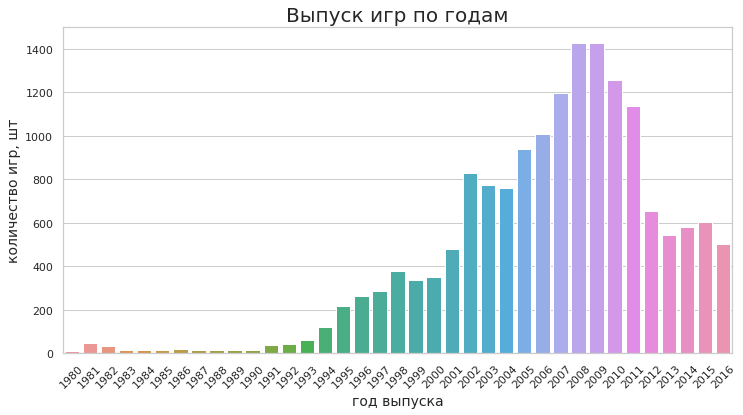

In [20]:
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(figsize=(12, 6))
sns.barplot(x=games['year_of_release'].value_counts().index, 
            y=games['year_of_release'].value_counts().values, 
            ax=axes)

plt.xticks(rotation=45)
plt.title('Выпуск игр по годам', fontsize=20)
plt.xlabel('год выпуска', fontsize=14)
plt.ylabel('количество игр, шт', fontsize=14)
plt.show()

До **1990** года выпускалось мало игр. Также актуальность таких игр устарела. Нет необходимости учитывать их в исследованиях.

Однако помимо года релиза необходимо учитывать и актуальность игровых платформ. Посмотрим, как менялись продажи по платформам:
* построим распределение суммарных продаж по годам
* найдём платформы, на которые выпускаются игры в 2016 году
* выберем из них платформы с наибольшими суммарными продажами

In [21]:
# формируем сводную таблицу по продажам игра на всех платформах
total_sales = (games
               .query('year_of_release > 1990') # не берем в расчет игры до 1990 года
               .pivot_table(values='total_sales', 
                            index='platform', 
                            columns='year_of_release', 
                            aggfunc='sum')
            )

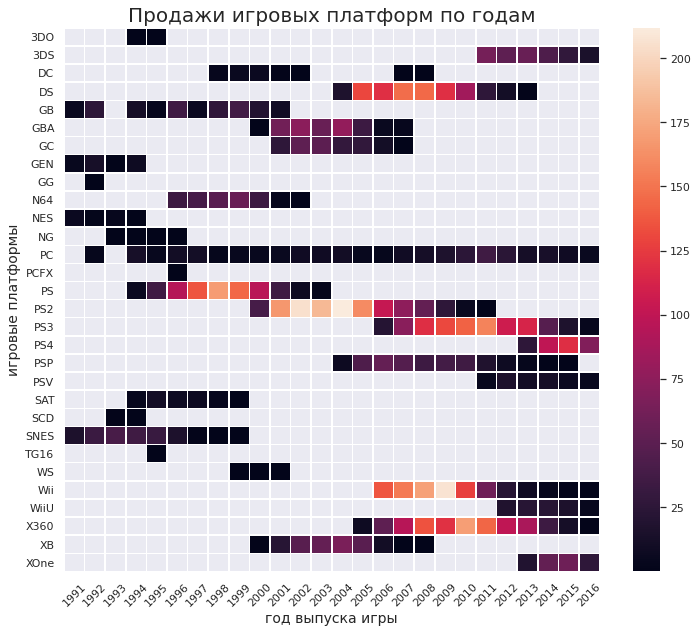

In [22]:
# строим график heatmap
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(total_sales, linewidth=.5)
ax.set_ylabel('игровые платформы', fontsize=14)
ax.set_xlabel('год выпуска игры', fontsize=14)
ax.set_xticklabels(total_sales.columns, rotation = 45, ha='center')
ax.set_title('Продажи игровых платформ по годам', fontsize=20)
plt.show()

По графику можно наблюдать, что с появлением платформы резко возрастает количество продаж игр для неё, но и, чаще всего, так же резко падают продажи через **~5 лет**. Платформа "живёт" около **10 лет**.

In [23]:
# найдём платформы, на которые выпускались игры в 2016 году
actual_platforms = (games
                    .loc[games['year_of_release'] == 2016, 'platform']
                    .unique()
                )
print('Актуальные платформы на 2016 год:', *actual_platforms)

Актуальные платформы на 2016 год: PS4 3DS XOne WiiU PS3 PC X360 PSV Wii


In [24]:
# находим топ 20 платформ
top_platforms = (games
                 .groupby('platform')['total_sales']
                 .sum()
                 .sort_values(ascending=False)
                 .head(20)
                 .index
                )
print('Платформы с наибольшими суммарными продажами:', *top_platforms)

Платформы с наибольшими суммарными продажами: PS2 X360 PS3 Wii DS PS PS4 GBA PSP 3DS PC GB XB NES N64 SNES GC XOne 2600 WiiU


Построим распределение суммарных продаж по годам для популярных и актуальных на 2016 год платформ.

In [25]:
# срез из изначальной таблицы по актуальным платформаам и платформам с максимальными продажами
games_actual = games.query('platform in @top_platforms and platform in @actual_platforms')

# формируем сводную таблицу по продажам игра на актуальных и популярных платформах
actual_sales = (games_actual
                .query('year_of_release > 1990')
                .pivot_table(values='total_sales', 
                             index='platform', 
                             columns='year_of_release', 
                             aggfunc='sum')
            )

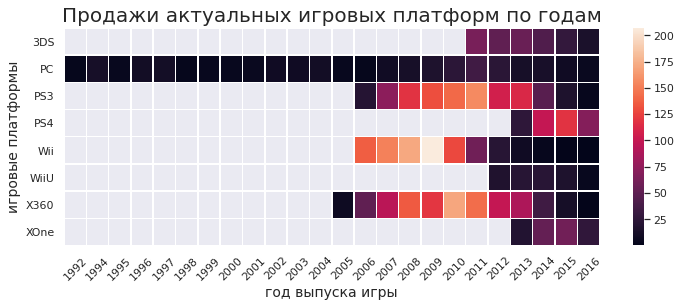

In [26]:
# строим heatmap
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(actual_sales, linewidth=.5)
ax.set_ylabel('игровые платформы', fontsize=14)
ax.set_xlabel('год выпуска игры', fontsize=14)
ax.set_xticklabels(actual_sales.columns, rotation = 45, ha='center')
ax.set_title('Продажи актуальных игровых платформ по годам', fontsize=20)
plt.show()

* По графику видно, что большинство актуальных на 2016 год игровых платформ появились после 2010 года. Однако, с 2013 года появились новые поколения наиболее популярных ировых платформ. Будем считать соответствующий **Актуальный период с 2013 по 2016 год**.
* Также отметим, что актуальные на 2010 год `PS3`, `Wii` и `X360` к 2016 практически полностью утратили продажи, так как были заменены в 2012-2013 годах новыми поколениями игровых платформ `PS4`, `WiiU` и `XOne`. В данном случае нет смысла продвигать старые платформы, не будем их учитывать при анализе.
* Игровые платформы для исследования: **3DS, PC, PS4, WiiU, XOne**.
* Построим распределение суммарных продаж по годам для актуальных игровых платформ за актуальный период.

In [27]:
# выделим срез данных по актуальным платформам и периоду релиза игр
actual_platforms = ['3DS', 'PC', 'PS4', 'WiiU', 'XOne']
games_actual = games_actual.query('platform in @actual_platforms and year_of_release >= 2013')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 А насколько правильно отфильтровывать кроме периода еще и часть платформ? Ладно если для текущего анализа, но у нас еще будет анализ по жанрам и регионам.</font>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

А мне кажется логично, ведь мы делаем исследование для того, чтобы показать на конкретную платформу и конкретный жанр игр (ну или пару) для рекламной компании. 
    
Мы провели исследование по платформам и поняли, что актуальные допустим PS и Xbox. А затем мы делаем исследование по жанрам по всем платформам и видим, что выигрывает допустим какой-нибудь пазл. А все потому, что мы взяли в исследование портативную приставку, на которой в шутер играть не удобно, а вот в пазлы супер. И мы скажем бизнесу выпускайте игры на Xbox в жанре пазл. Кто из пользователей Xbox играет в пазлы?)

</div>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Если бы у всех платформ были бы равномерно (пропорционально глобальным продажам) распределены жанры, то я бы еще согласился. Но это не так. И при анализе жанров мы такой фильтрацией сразу уменьшим датасет и можем получить не валидный результат. А у аналитика слово "логично" должно быть подтверждено цифрами. 😲</font>

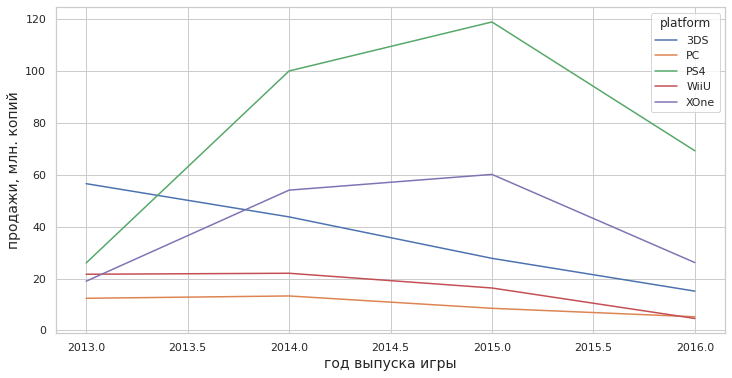

In [28]:
# строим распределение с помощью lineplot
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(x='year_of_release',
             y='total_sales',
             hue='platform',
             markers=True,
             data=(games_actual
                   .groupby(['platform','year_of_release'])['total_sales']   # группируем по платформам и годам
                   .agg('sum')                                             # считаем суммы продаж по платформам и годам
                   .reset_index()
                     )
            )
plt.xlabel('год выпуска игры', fontsize=14)
plt.ylabel('продажи, млн. копий', fontsize=14)
plt.show()

* Спад уровня продаж для `PS4` и `XOne` в 2016 году скорее всего объясняется тем, что информация не полная (год не закончен на момент сбора данных).
* Проанализируем изменения суммарных продаж выбранных платформ по времени:
    * `PS4` и `XOne` демонстрируют рост уровня суммарных продаж с 2013 по 2015 год.
    * `PS4` лидер по продажам на момент конца 2015 года и на момент сбора данных в 2016 году.
    * Суммарные продажи `3DS` медленно падают с 2013 года.
    * Суммарные продажи `WiiU` практически не меняются, оставаясь на уровне 20 млн копий с 2013 по 2015 год.
    * Суммарные продажи игр на `PC` невысокие и медленно падают.
    * Однако игры на `PC` продаются с 1980-х годов, с плавными подъёмами и спадами. В этом смысле `PC` самая стабильная из всех рассматриваемых игровых платформ.

### 3.2 Исследование продаж по актуальным платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

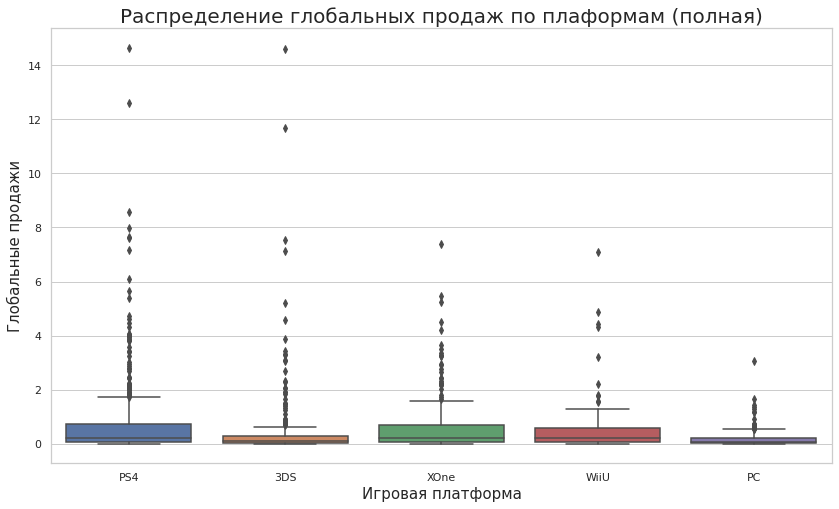

In [29]:
# построим распределение глобальных продаж с помощью метода boxplot() библиотеки seaborn
plt.figure(figsize=(14,8))
sns.set(style='whitegrid')
ax = sns.boxplot(data=games_actual, y='total_sales', x='platform')
ax.set_title('Распределение глобальных продаж по плаформам (полная)', fontsize=20)
ax.set_xlabel('Игровая платформа', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
plt.show()

Так как выбросов довольно много, они искажают график. Построим приближенный график для более подробного изучения «ящика».

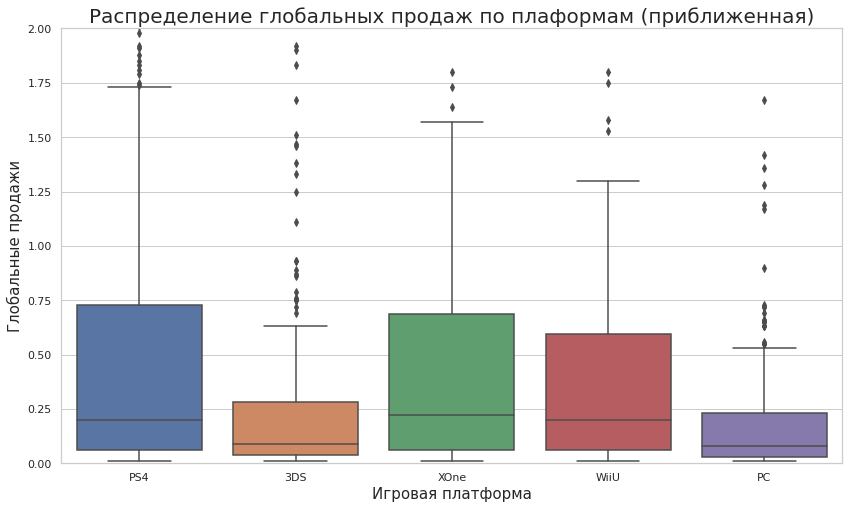

In [30]:
# построим распределение глобальных продаж с помощью метода boxplot() библиотеки seaborn.
# установим границы оси y (в данных много выбросов, которые искажают boxplot)
plt.figure(figsize=(14,8))
sns.set(style='whitegrid')
ax = sns.boxplot(data=games_actual, y='total_sales', x='platform')
ax.set_title('Распределение глобальных продаж по плаформам (приближенная)', fontsize=20)
ax.set_xlabel('Игровая платформа', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
ax.set_ylim([0, 2])
plt.show()

In [31]:
games_actual['total_sales'].describe()

count    1246.000000
mean        0.578467
std         1.282996
min         0.010000
25%         0.040000
50%         0.140000
75%         0.490000
max        14.630000
Name: total_sales, dtype: float64

In [32]:
print('Доля выбросов от общего количества данных:', 
      round(len(games_actual.loc[games_actual['total_sales'] >= (0.43-0.04)*1.5+0.43]) / len(games_actual) * 100, 2), '%')

Доля выбросов от общего количества данных: 14.45 %


* В данных много выбросов (**14.45%** от общего количества данных). Это свойство данного датасета, оставим их как есть.
* Значения глобальных продаж по всем платформам сильно скошены вправо. Есть достаточно большое количество игр с очень высокими показателями продаж по сравнению со средними значениями.
* Медианные значения уровня глобальных продаж у `PS4`, `XOne` и `WiiU` примерно одинаковы **(0.2 млн копий)**. У `WiiU` дисперсия немного меньше, чем у `PS4` и `XOne`. Однако ранее было замечено, что суммарные продажи по годам для платформ `PS4` и `XOne` заметно выше, чем у `WiiU`. Большое количество выбросов (игр с очень высоким уровнем продаж) у `PS4` и `XOne` сильно увеличивают суммарные продажи.
* Наименьшее медианное значение глобальных продаж у платформы `PC`.

### 3.3 Влияние отзывов пользователей и критиков на продажи по платформе 'PS4'

Посмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков. Возьмем самую популярную - **`PS4`**.
* Построим диаграмму рассеяния с помощью функции `regplot()` библиотеки seaborn
* Посчитаем корреляцию между отзывами и продажами.

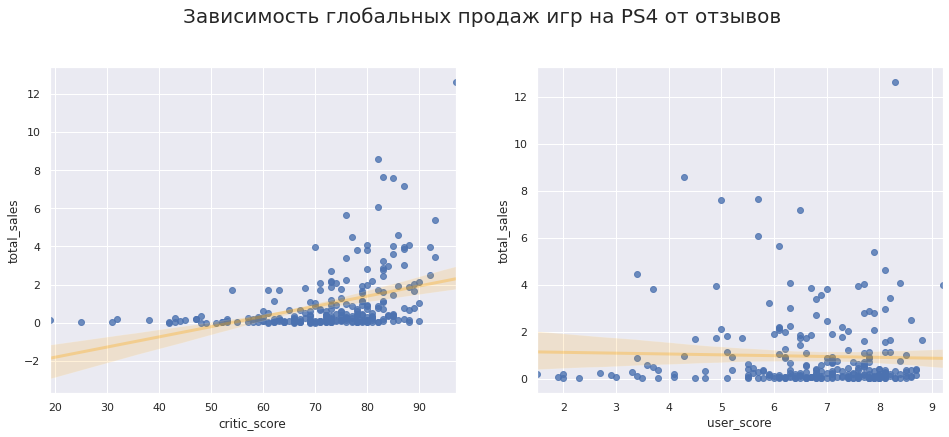

In [33]:
# возьмём срез данных по платформе PS4, сохраним его в переменной games_ps4. 
games_ps4 = games_actual.loc[games_actual['platform'] == 'PS4']
                              
sns.set()
fig = plt.figure(figsize=(16,6))
fig.suptitle('Зависимость глобальных продаж игр на PS4 от отзывов', fontsize=20, y=1.02)

ax1 = plt.subplot(121)
sns.regplot(x=games_ps4.loc[games_ps4['critic_score'] >= 0, 'critic_score'], # убираем пропуски (заглушка -1)
            y=games_ps4.loc[games_ps4['critic_score'] >= 0, 'total_sales'],  # убираем пропуски (заглушка -1)
            line_kws={"color":"orange","alpha":0.3,"lw":3})

ax2 = plt.subplot(122)
sns.regplot(x=games_ps4.loc[games_ps4['user_score'] >= 0, 'user_score'], 
            y=games_ps4.loc[games_ps4['user_score'] >= 0, 'total_sales'],
            line_kws={"color":"orange","alpha":0.3,"lw":3})
plt.show()

In [34]:
# посчитаем коэффициенты корреляции между глобальными продажами игр на PS4 и отзывами на игры
display(games_ps4.loc[games_ps4['critic_score'] >= 0, ['critic_score', 'total_sales']].corr())
display(games_ps4.loc[games_ps4['user_score'] >= 0, ['user_score', 'total_sales']].corr())

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


* На графиках видно, что между глобальными продажами игр на `PS4` и отзывами критиков есть слабая корреляция. Это также подтверждается коэффициентом корреляции **0.41**.
* Между глобальными продажами игр на `PS4` и отзывами пользователей корреляции не наблюдается. Это также подтверждается коэффициентом корреляции **-0.032**.

Построим диаграммы рассеяния и найдём коэффициенты корреляции по остальным платформам и сравним результаты.

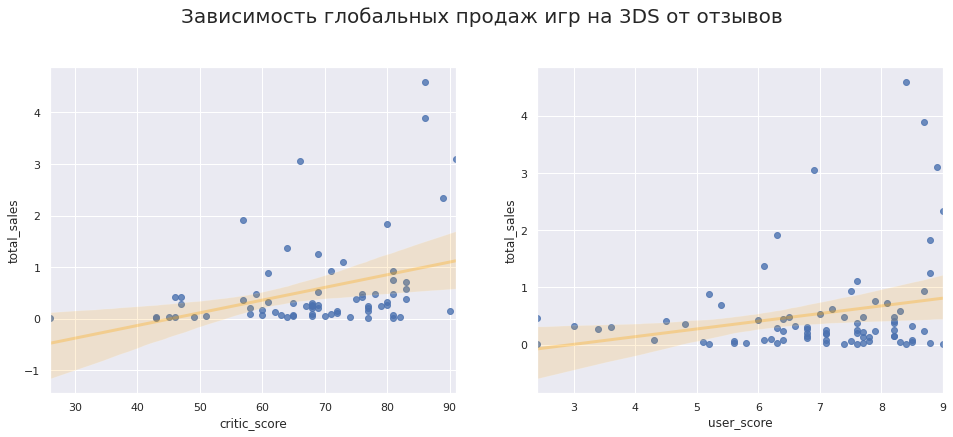

Коэффициенты корреляции


,platform,level_1,critic_score,user_score
0,3DS,total_sales,0.357057,0.241504


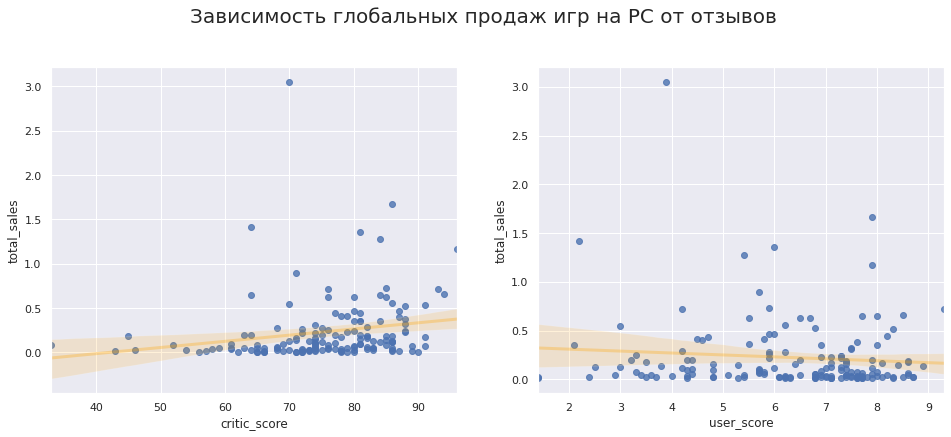

Коэффициенты корреляции


,platform,level_1,critic_score,user_score
1,PC,total_sales,0.19603,-0.093842


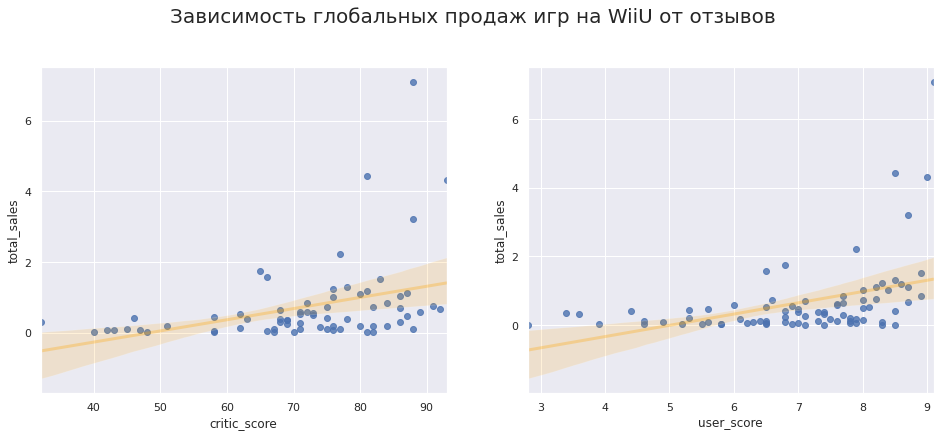

Коэффициенты корреляции


,platform,level_1,critic_score,user_score
3,WiiU,total_sales,0.376415,0.41933


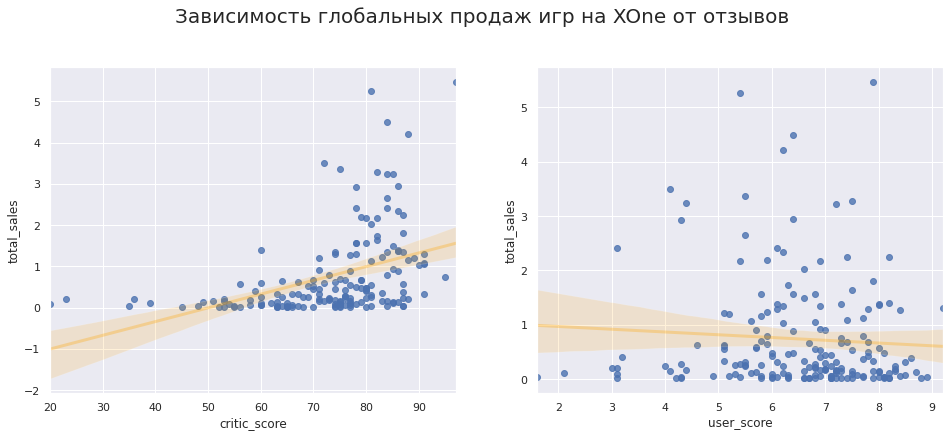

Коэффициенты корреляции


,platform,level_1,critic_score,user_score
4,XOne,total_sales,0.416998,-0.068925


In [35]:
# находим коэффициенты корреляции для всех платформ
rating_corr = pd.merge(
    (games_actual
    .query('critic_score >= 0')                            # убираем пропуски (заглушка -1)
    .groupby(['platform'])[['total_sales','critic_score']]
    .agg('corr')
    .reset_index()
    .query('level_1 == "total_sales"')
    .iloc[:,[0,1,3]]),
    
    (games_actual
    .query('user_score >= 0')                             # убираем пропуски (заглушка -1)
    .groupby(['platform'])[['total_sales','user_score']]
    .agg('corr')
    .reset_index()
    .query('level_1 == "total_sales"')
    .iloc[:,[0,1,3]]),
    how='left'
)
# в цикле строим диаграммы рассеяния для каждой платформы
for pltatform in actual_platforms:  # берем данные по всем актуальным платформам,
    if pltatform != 'PS4':          # кроме PS4

        games_pltatform = games_actual.loc[games_actual['platform'] == pltatform]                          

        sns.set()
        fig = plt.figure(figsize=(16,6))
        fig.suptitle(f'Зависимость глобальных продаж игр на {pltatform} от отзывов', fontsize=20, y=1.02)

        ax1 = plt.subplot(121)
        sns.regplot(x=games_pltatform.loc[games_pltatform['critic_score'] >= 0, 'critic_score'],
                y=games_pltatform.loc[games_pltatform['critic_score'] >= 0, 'total_sales'],
                line_kws={"color":"orange","alpha":0.3,"lw":3})

        ax2 = plt.subplot(122)
        sns.regplot(x=games_pltatform.loc[games_pltatform['user_score'] >= 0, 'user_score'], 
                y=games_pltatform.loc[games_pltatform['user_score'] >= 0, 'total_sales'],
                line_kws={"color":"orange","alpha":0.3,"lw":3})
        plt.show()
        print('Коэффициенты корреляции')             # для каждой платформы выводим коэффициенты корреляии с отзывами
        display(rating_corr[rating_corr['platform'] == pltatform])

* Между глобальными продажами и оценками критиков наблюдается слабая корреляция **(0.36 - 0.42)** по всем игровым платформам, кроме `PC` **(0.2)**.
* Между глобальными продажами и оценками пользователей корреляция не наблюдается по платформам `PS4`, `XOne` и `PC`. Однако для платформы `3DS` наблюдается очень слабая корреляция **0.24** между этими параметрами. Для платформы `WiiU` корреляция ещё выше **(0.42)** (показатель выше, чем корреляция с оценками критиков).
* Можно сделать вывод, что пользователи игровой платформы `WiiU` перед покупкой очередной игры интересуются мнением других игроков (помимо оценок критиков).
* В целом оценки критиков важнее для продвижения игровой платформы (хотя об игроках тоже не стоит забывать, ведь игры делаются для них).

### 3.4 Влияние жанра игры на продажи

Посмотрим на общее распределение игр по жанрам.

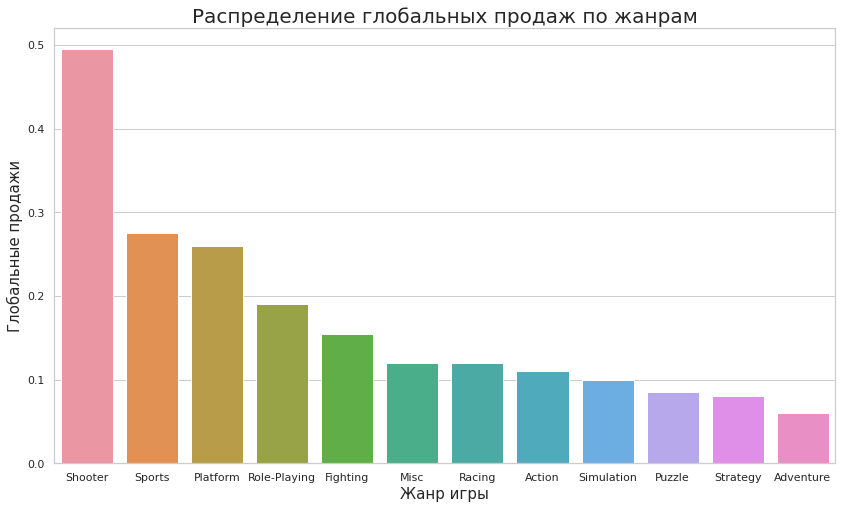

In [36]:
# отсортируем список жанров игр по убыванию медианы глобальных продаж
genres_sorted = (games_actual
                 .groupby('genre')['total_sales']
                 .agg('median')
                 .sort_values(ascending=False)
                 .index
                )
# построим распределение глобальных продаж с помощью метода barplot() библиотеки seaborn.
plt.figure(figsize=(14,8))
sns.set(style='whitegrid')
ax = sns.barplot(data=games_actual, y='total_sales', x='genre', order = genres_sorted, ci=False, estimator=np.median)
ax.set_title('Распределение глобальных продаж по жанрам', fontsize=20)
ax.set_xlabel('Жанр игры', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
plt.show()

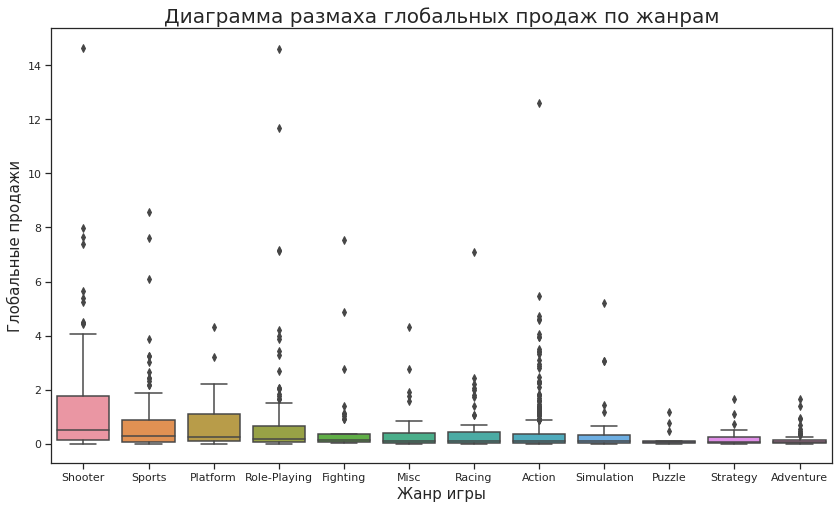

In [37]:
# построим распределение глобальных продаж с помощью метода boxplot() библиотеки seaborn.
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=games_actual, y="total_sales", x='genre', order = genres_sorted)
# order = genres_sorted - для расстановки ящиков в порядке убывания глобальных продаж
ax.set_title('Диаграмма размаха глобальных продаж по жанрам', fontsize=20)
ax.set_xlabel('Жанр игры', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
#ax.set_ylim([0, 4.5])
plt.show()

* Самым популярным и продаваемым жанром является `Shooter` (медианное значение **~0.5** млн копий по всем платформам).
* Также популярными являются жанры `Sports`, `Platform` и `Role-Playing` (медианное значение **~0.2 - 0.25** млн копий по всем платформам). Именно на эти жанры стоит обратить внимание при продвижении игровых платформ.
* Наименее продаваемыми являются жанры `Pazzle`, `Strategy`, `Adventure` (медианное значение менее **0.1** млн копий по всем платформам)

**Выводы**

* Проанализированы уровни глобальных продаж по различным игровым платформам. Выделены основные популярные платформы на 2016 год **PS4, 3DS, XOne, WiiU, PC**.
* Выделен актуальный период для исследования игр **с 2013 по 2016 гг**.
* Рассмотрены изменения продаж выбранных игровых платформ за актуальный период.
    * Лидером по суммарным продажам является `PS4`. Однако медианные значения для `XOne`, `WiiU` и `PS4` примерно равны. Это обусловлено большим количеством выбросов (популярные игры с высокими продажами). Доля выбросов около **14%**.
    * Наименьшее медианное значение глобальных продаж у платформы `PC`. Однако игры на `PC` продаются с 1980-х годов, с плавными подъёмами и спадами. В этом смысле PC самая стабильная из всех рассматриваемых игровых платформ.
* Рассмотрено влияние отзывов пользователей и критиков на продажи по платформе `PS4`. Рассчитаны коэффициенты корреляции между продажами и оценками для всех платформ.
    * Между глобальными продажами и оценками критиков наблюдается небольшая корреляция **(0.34 - 0.41)** по всем игровым платформам.
    * Между глобальными продажами и оценками пользователей корреляция не наблюдается по платформам `PS4`, `XOne` и `PC`.
    * Для платформы `3DS` наблюдается небольшая корреляция **0.27** между этими параметрами.
    * Для платформы `WiiU` корреляция ещё выше **(0.41)**. Пользователи игровой платформы `WiiU` перед покупкой очередной игры интересуются мнением других игроков (помимо оценок критиков).
    * В целом оценки критиков важнее для продвижения игровой платформы.
* Рассмотрено влияние жанра игры на продажи.
    * Самым популярным и продаваемым жанром является `Shooter` (медианное значение **~0.5** млн копий по всем платформам).
    * Наименее продаваемыми являются жанры `Pazzle`, `Adventure`, `Strategy `(медианное значение менее **0.1** млн копий)

## 4. Портрет пользователя каждого региона

Определим для пользователей каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5).
* Влияние рейтинга ESRB на продажи в отдельном регионе.

---

**1)** Представим в сводной таблице доли продаж по различным платформам для каждого региона в %:

In [38]:
platform_share = (games
                  .query('year_of_release >= 2013')                          # срез данных по актупльному периоду;
                  .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']] # группируем по платформам;
                  .agg('sum')                                                # сумма по продажам в регионах для разных платформ;
                  .apply(lambda x: round(x / x.sum() * 100, 2))              # считаем % продаж для игровой платформы 
                 )                                                           # от общих продаж в регионе за актуальный период;
platform_share

,na_sales,eu_sales,jp_sales
platform,,,
3DS,8.73,7.89,48.17
DS,0.13,0.22,0.00
PC,2.54,6.47,0.00
PS3,14.51,17.29,16.59
PS4,24.84,35.97,11.34
PSP,0.00,0.04,2.34
PSV,1.15,1.56,13.21
Wii,1.50,1.51,0.04
WiiU,6.67,5.06,7.73


In [39]:
print('Топ 5 платформ для Северной Америки:')
display(platform_share.sort_values(by='na_sales', ascending=False).head(5)['na_sales'])

Топ 5 платформ для Северной Америки:


platform
PS4     24.84
XOne    21.27
X360    18.66
PS3     14.51
3DS      8.73
Name: na_sales, dtype: float64

In [40]:
print('Топ 5 платформ для Европы:')
display(platform_share.sort_values(by='eu_sales', ascending=False).head(5)['eu_sales'])

Топ 5 платформ для Европы:


platform
PS4     35.97
PS3     17.29
XOne    13.15
X360    10.84
3DS      7.89
Name: eu_sales, dtype: float64

In [41]:
print('Топ 5 платформ для Японии:')
display(platform_share.sort_values(by='jp_sales',ascending=False).head(5)['jp_sales'])

Топ 5 платформ для Японии:


platform
3DS     48.17
PS3     16.59
PSV     13.21
PS4     11.34
WiiU     7.73
Name: jp_sales, dtype: float64

Визуализируем портреты пользователей по платформам с помощью круговой диаграммы.

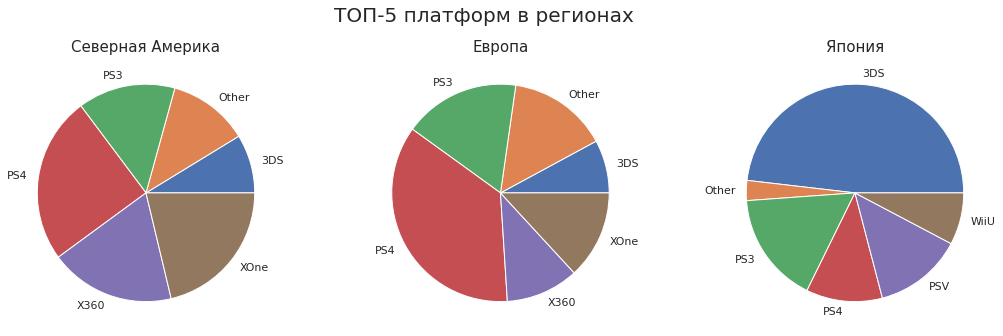

In [42]:
# напишем функцию для построения графика методом pie() библиотеки matplotlib
def show_pie(df, col):
    df['group'] = (df.index.where(df.index.isin(df.sort_values(by=col, ascending=False).head(5).index),'Other'))
    plt.pie(df.groupby('group').sum()[col], labels=df.groupby('group').sum()[col].index)

fig = plt.figure(figsize=(18,5))
fig.suptitle('ТОП-5 платформ в регионах', fontsize=20, y=1.02)

ax1 = plt.subplot(131)
show_pie(platform_share, 'na_sales')
ax1.set_title('Северная Америка', fontsize=15)


ax2 = plt.subplot(132)
show_pie(platform_share, 'eu_sales')
ax2.set_title('Европа', fontsize=15)

ax3 = plt.subplot(133)
show_pie(platform_share, 'jp_sales')
ax3.set_title('Япония', fontsize=15)
plt.show()

* Предпочтения к игровым платформам в Северной Америке и Европе схожи. В ТОП попали разные поколения `PS` и `Xbox`. 
* Отметим бОльшую популярность игровых платформ от Microsoft в Северной Америке. 
* В Японии в ТОП-5 попали только платформы произведённые в Японии, и на первом месте портативная игровая платформа `3DS`. Это может быть обусловлено различиями на рынке компьютерных игр в Японии и мире. Многие игры создаются в Японии для своих платформ и своей аудитории (не выходя на международный рынок).

---

**2)** Представим в сводной таблице доли продаж по различным жанрам для каждого региона в %:

In [43]:
genres_share = (games
                  .query('year_of_release >= 2013')                          # срез данных по актупльному периоду;
                  .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]    # группируем по жанрам;
                  .agg('sum')                                                # сумма по продажам в регионах для разных платформ;
                  .apply(lambda x: round(x / x.sum() * 100, 2))              # считаем % продаж для игровой платформы 
                 )                                                           # от общих продаж в регионе за актуальный период;
genres_share

,na_sales,eu_sales,jp_sales
genre,,,
Action,28.80,30.12,28.76
Adventure,1.63,2.10,4.13
Fighting,3.55,2.18,5.43
Misc,6.28,5.11,6.54
Platform,4.14,3.97,3.40
Puzzle,0.19,0.25,0.84
Racing,2.96,5.15,1.63
Role-Playing,10.60,9.43,36.26
Shooter,25.07,22.40,4.70


In [44]:
print('Топ 5 жанров для Северной Америки:')
display(genres_share.sort_values(by='na_sales', ascending=False).head(5)['na_sales'])

Топ 5 жанров для Северной Америки:


genre
Action          28.80
Shooter         25.07
Sports          14.91
Role-Playing    10.60
Misc             6.28
Name: na_sales, dtype: float64

In [45]:
print('Топ 5 жанров для Европы:')
display(genres_share.sort_values(by='eu_sales', ascending=False).head(5)['eu_sales'])

Топ 5 жанров для Европы:


genre
Action          30.12
Shooter         22.40
Sports          15.43
Role-Playing     9.43
Racing           5.15
Name: eu_sales, dtype: float64

In [46]:
print('Топ 5 жанров для Японии:')
display(genres_share.sort_values(by='jp_sales', ascending=False).head(5)['jp_sales'])

Топ 5 жанров для Японии:


genre
Role-Playing    36.26
Action          28.76
Misc             6.54
Fighting         5.43
Shooter          4.70
Name: jp_sales, dtype: float64

Визуализируем портреты пользователей по жанрам с помощью круговой диаграммы.

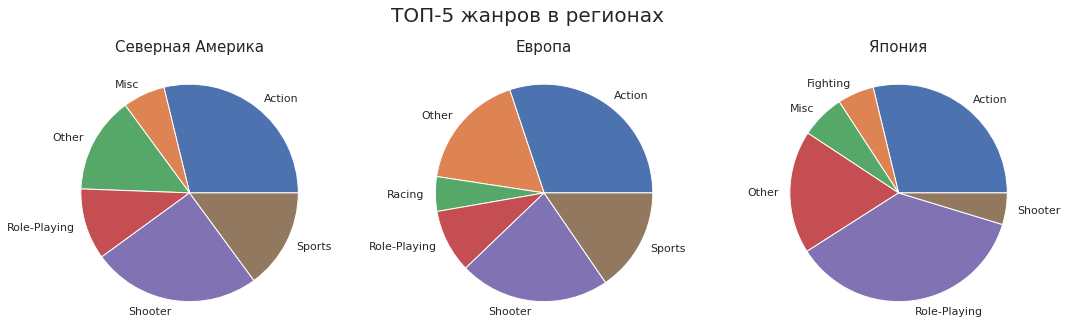

In [47]:
fig = plt.figure(figsize=(18,5))
fig.suptitle('ТОП-5 жанров в регионах', fontsize=20, y=1.02)

ax1 = plt.subplot(131)
show_pie(genres_share, 'na_sales')
ax1.set_title('Северная Америка', fontsize=15)


ax2 = plt.subplot(132)
show_pie(genres_share, 'eu_sales')
ax2.set_title('Европа', fontsize=15)

ax3 = plt.subplot(133)
show_pie(genres_share, 'jp_sales')
ax3.set_title('Япония', fontsize=15)
plt.show()

* ТОП5 жанров для Европы и Северной Америки практически не отличаются `Action`, `Shooter`, `Sports`, `Role-Playing`. Это также свидетельствует о том, что данные регионы представляют часть глобального рынка игровой индустрии. В данных регионах играют в одни и те же игры.
* Японский рынок отличается. Помимо `Role-Playing`и `Action` там любят `Misc` и `Fighting`. А `Shooter` покупают гораздо меньше, чем в других регионах. Это может быть обусловлено менталитетом игроков и обособленностью рынка.

---

**3)** Представим в сводной таблице доли продаж игр по рейтингу ESRB для каждого региона  в %:

In [48]:
rating_share = (games
                  .query('year_of_release >= 2013')       # срез данных по актупльному периоду;
                  .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]   # группируем по рейтингу;
                  .agg('sum')                                                # сумма по продажам в регионах для разных платформ;
                  .apply(lambda x: round(x / x.sum() * 100, 2))              # считаем % продаж для игровой платформы 
                 )                                                           # от общих продаж в регионе за актуальный период;
rating_share

,na_sales,eu_sales,jp_sales
rating,,,
E,18.06,21.25,10.75
E10+,12.39,10.88,4.18
M,37.74,37.05,10.02
T,11.38,10.70,14.63
unknown,20.43,20.12,60.41


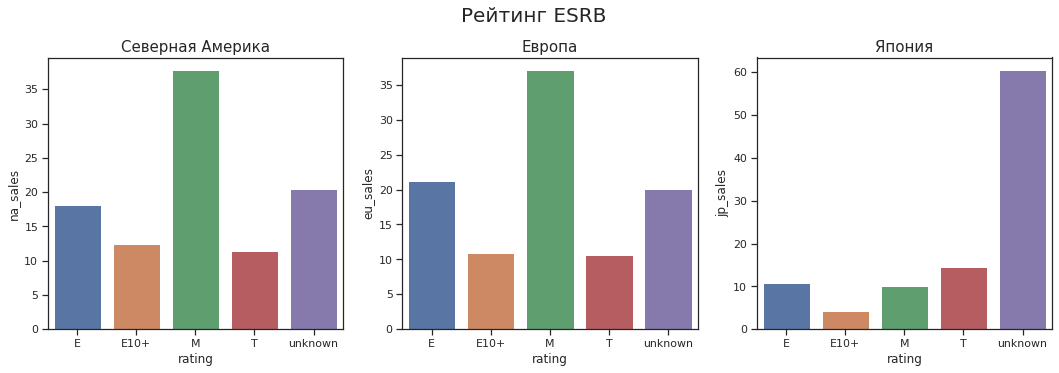

In [49]:
# визуализируем портреты пользователей по рейтингу ESRB с помощью barplot.
fig = plt.figure(figsize=(18,5))
fig.suptitle('Рейтинг ESRB', fontsize=20, y=1.02)

ax1 = plt.subplot(131)
sns.barplot(data=rating_share, y='na_sales', x=rating_share.index, ci=False)
ax1.set_title('Северная Америка', fontsize=15)

ax2 = plt.subplot(132)
sns.barplot(data=rating_share, y='eu_sales', x=rating_share.index, ci=False)
ax2.set_title('Европа', fontsize=15)

ax3 = plt.subplot(133)
sns.barplot(data=rating_share, y='jp_sales', x=rating_share.index, ci=False)
ax3.set_title('Япония', fontsize=15)
plt.show()

* По рейтингу ESRB регионы Северная Америка и Европа также очень похожи. 
    * Большинство игр покупают с рейтингом `M` (17+) и `Е` (без ограничений). Реже для `E10+` и `T`. Это может быть обусловлено запросом игроков на взрослый контент в играх (рейтинг `М`) и желанием компаний охватывать максимальное количество возрастных групп (игры категории `E`).
    * В обоих регионах высока доля игр, которые не имеют оценки ESRB.
* Рынок Японии отличается. 
    * Большинство игр имеют статус `unknown`, это связано с тем, что рейтинг ESRB предназначен для маркировки игр для США и Канады. На японском рынке больше продаются игры из внутреннего рынка, которые не имеют рейтинга по ESRB.
    * Если проанализировать те игры, которые имеют такую оценку, то мы увидим, что в большей мере покупают игры для детей и подростков (категории `T` и `E`).

**Выводы**

* Найдены ТОП-5 платформ с максимальными долями продаж для Северной Америки, Европы и Японии.
    * Для Европы и Северной Америки предпочтения в игровых платформах схожи. В ТОПе разные поколения `PS` и `Xbox`.
    * В Японии же кроме `PS` популярны платформы серии `DS`.
* Найдены ТОП-5 жанров с максимальными долями продаж для Северной Америки, Европы и Японии.
    * Для Европы и Северной Америки данные практически не отличаются `Action`, `Shooter`, `Sports`, `Role-Playing`.
    * В Японии помимо `Role-Playing` и `Action` любят `Misc` и `Fighting`. А `Shooter` покупают гораздо меньше.
* Проанализированы зависимости уровня продаж игр от рейтинга ESRB в каждом регионе.
    * Для Европы и Северной Америки большинство игр покупают с рейтингом `M` (17+) и `Е` (без ограничений). Это может быть обусловлено запросом игроков на взрослый контент в играх (рейтинг `М`) и желанием компаний охватывать максимальное количество возрастных групп (игры категории `E`).
    * В Японии большая часть имеет неопределенный рейтинг ESRB. Среди тех игр, котрые имеют такую оценку в большей мере покупают игры для детей и подростков (категории T и E).
* Различия в продажах между Японией и остальными регионами обуславливается большей ориентированностью японских игроков на внутренний рынок. Многие игры создаются в японии для внутреннего рынка и для собственных платформ.

## 5. Проверка гипотез

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

* H₀ - cредняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC
* H₁ - cредняя пользовательская оценка игр на платформе Xbox One не равна средней пользовательской оценке игр на платформе PC

Определим уровень значимости `alpha = 0.05`.

Выборки оценок по платформам `XOne` и `PC` не связаны друг с другом. Для расчёта статистики разности и `p-value` будем использовать функцию `st.ttest_ind`.

In [50]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    games_actual.query('platform == "XOne" and user_score >= 0')['user_score'], 
    games_actual.query('platform == "PC" and user_score >= 0')['user_score'],
    equal_var = False)

print('Средний пользовательский рейтинг Xbox One:', 
      games_actual.query('platform == "XOne" and user_score >= 0')['user_score'].mean())
print('Средний пользовательский рейтинг PC:', 
      games_actual.query('platform == "PC" and user_score >= 0')['user_score'].mean())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC: 6.2696774193548395
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


* `p-value` равен 0.15 > alpha. Исходя из этого, у нас нет оснований отвергать нулевую гипотезу. 
* Эмпирически полученные данные не противоречат гипотезе H₀: "Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC". Средние пользовательские рейтинги платформ Xbox One и PC близки.

### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

* H₀ - средняя пользовательская оценка игр жанра Action равна средней пользовательской оценке игр жанра Sports
* H₁ - средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports

Определим уровень значимости `alpha = 0.05`.

Выборки оценок по жанрам `Action` и `Sports` не связаны друг с другом. Для расчёта статистики разности и `p-value` будем использовать функцию `st.ttest_ind`.

In [51]:
results = st.ttest_ind(
    games_actual.query('genre == "Action" and user_score >= 0')['user_score'], 
    games_actual.query('genre == "Sports" and user_score >= 0')['user_score'],
    equal_var = False)

print('Средний пользовательский рейтинг жанра Action:', 
      games_actual.query('genre == "Action" and user_score >= 0')['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', 
      games_actual.query('genre == "Sports" and user_score >= 0')['user_score'].mean())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action: 6.822047244094488
Средний пользовательский рейтинг жанра Sports: 5.561458333333334
p-значение: 6.954390687344237e-11
Отвергаем нулевую гипотезу


* `p-value` практически равен 0 (гораздо меньше alpha). Исходя из этого, признаём нулевую гипотезу H₀ мало вероятной. 
* Эмпирически полученные данные позволяют отвергнуть нулевую гипотезу в пользу альтернативной H₁: "Средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports"

**Выводы**

По первой гипотезе:

Эмпирически полученные данные не противоречат гипотезе H₀:
* "Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC"
* Изначальная гипотеза оказалась верна.

По второй гипотезе:

Эмпирически полученные данные позволяют отвергнуть нулевую гипотезу в пользу альтернативной H₁:
* "Средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports"
* Изначальная гипотеза оказалась верна.

## Общий вывод

**1)** Данные успешно загружены из файла. В таблице `games` 16715 записей. Дубликатов не обнаружено. Данные соответствуют описанию.

**2)** Типы данных были преобразованы в соответствии с хранимой информацией.

* Пропуски были исследованы и обработаны.
    * Доля пропусков в столбцах достигает **52%**.
    * Возможные причины пропусков: отсутствие информации при сборе данных, или сбой в системе при выгрузке таблицы из базы данных

**3)** Проанализированы уровни глобальных продаж по различным игровым платформам. 
* Выделены основные популярные платформы на 2016 год `PS4`, `3DS`, `XOne`, `WiiU`, `PC`.
* Выделен актуальный период для исследования игр **с 2013 по 2016 гг**.
* Лидером по суммарным продажам является `PS4`. Однако медианные значения для `XOne`, `WiiU` и `PS4` примерно равны. Это обусловлено большим количеством выбросов (популярные игры с высокими продажами). Доля выбросов около **14%**.
* Между глобальными продажами и оценками критиков наблюдается слабая корреляция **(0.34 - 0.41)** по всем игровым платформам, кроме `PC` **(0.19)**. Для платформы 3DS наблюдается очень слабая корреляция **0.27** между этими параметрами. Для платформы WiiU корреляция ещё выше **(0.41)**. Пользователи игровой платформы `WiiU` перед покупкой очередной игры интересуются мнением других игроков (помимо оценок критиков).
* Рассмотрено влияние жанра игры на продажи.
    * Самым популярным и продаваемым жанром является `Shooter` (медианное значение **~0.5** млн копий по всем платформам).
    * Наименее продаваемыми являются жанры `Pazzle`, `Adventure`, `Strategy` (медианное значение менее **0.1** млн копий).

**4)** Составлен портрет пользователя каждого региона.

* Найдены ТОП-5 платформ с максимальными долями продаж для Северной Америки, Европы и Японии.
    * Для Европы и Северной Америки предпочтения в игровых платформах схожи. В ТОПе разные поколения `PS` и `Xbox`.
    * В Японии же кроме `PS` популярны платформы серии `DS`.
* Найдены ТОП-5 жанров с максимальными долями продаж для Северной Америки, Европы и Японии.
    * Для Европы и Северной Америки данные практически не отличаются `Action`, `Shooter`, `Sports`, `Role-Playing`.
    * В Японии помимо `Role-Playing` и `Action` любят `Misc` и `Fighting`. А `Shooter` покупают гораздо меньше.
* Проанализированы зависимости уровня продаж игр от рейтинга ESRB в каждом регионе.
    * Для Европы и Северной Америки большинство игр покупают с рейтингом `M` (17+) и `Е` (без ограничений). Это может быть обусловлено запросом игроков на взрослый контент в играх (рейтинг `М`) и желанием компаний охватывать максимальное количество возрастных групп (игры категории `E`).
    * В Японии большая часть имеет неопределенный рейтинг ESRB. Среди тех игр, котрые имеют такую оценку в большей мере покупают игры для детей и подростков (категории T и E).
* Различия в продажах между Японией и остальными регионами обуславливается большей ориентированностью японских игроков на внутренний рынок. Многие игры создаются в японии для внутреннего рынка и для собственных платформ.

**5)**  Проверены 2 гипотезы и сделаны следующие выводы:

Эмпирически полученные данные не противоречат гипотезе H₀:
* "Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC"
* Изначальная гипотеза оказалась верна.

Эмпирически полученные данные позволяют отвергнуть нулевую гипотезу в пользу альтернативной H₁:
* "Средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports"
* Изначальная гипотеза оказалась верна.

**6)** Рекомендации для рекламной компании:
* Из трех регионов прослеживается схожесть пользователей Северной Америки и Европы. Рынок Японии является обособленным, большая часть игроков ориентирована на внутренний рынок. Для охвата большего сегмента (2/3) следует провести рекламную кампанию для **Северной Америки и Европы**.
* На первых местах по продажам игр в NA и EU выступают последние модели игровых платформ от Sony и Microsoft - PS и Xbox. Так как срок жизни игровых платформ составляет ~10 лет, а для `PS3` и `X360` пик популярности уже прошел, следует обратить внимание на более перспективные **`PS4`** и **`XOne`**.
* В жанрах аудитория данных регионов единогласно отдает предпочтение категории **`Shooter`**.
* По рейтингу ESRB наибольшее количество продаж приходится на категорию **`М`** - взрослый контнент (17+).